# Import Library


In [203]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Load Dataset 

In [204]:
df_ikan = pd.read_csv('fish_data.csv')
df_ikan

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31
...,...,...,...,...
4075,Sillaginopsis panijus,30.56,6.12,0.20
4076,Sillaginopsis panijus,29.66,6.11,0.21
4077,Sillaginopsis panijus,32.81,6.25,0.19
4078,Sillaginopsis panijus,29.78,6.11,0.21


# Encoder

In [220]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_ikan['species_encoded'] = label_encoder.fit_transform(df_ikan['species'])

In [206]:
df_ikan.describe

<bound method NDFrame.describe of                     species  length  weight  w_l_ratio  species_encoded
0        Anabas testudineus   10.66    3.45       0.32                0
1        Anabas testudineus    6.91    3.27       0.47                0
2        Anabas testudineus    8.38    3.46       0.41                0
3        Anabas testudineus    7.57    3.36       0.44                0
4        Anabas testudineus   10.83    3.38       0.31                0
...                     ...     ...     ...        ...              ...
4075  Sillaginopsis panijus   30.56    6.12       0.20                8
4076  Sillaginopsis panijus   29.66    6.11       0.21                8
4077  Sillaginopsis panijus   32.81    6.25       0.19                8
4078  Sillaginopsis panijus   29.78    6.11       0.21                8
4079  Sillaginopsis panijus   31.62    6.14       0.19                8

[4080 rows x 5 columns]>

In [207]:
df_ikan.species_encoded

0       0
1       0
2       0
3       0
4       0
       ..
4075    8
4076    8
4077    8
4078    8
4079    8
Name: species_encoded, Length: 4080, dtype: int64

# Split Dependen & Independent

In [208]:
X = df_ikan[['length', 'weight', 'w_l_ratio']].values
y = df_ikan['species_encoded'].values

# Split the Dataset

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [210]:
df_ikan.describe()

,length,weight,w_l_ratio,species_encoded
count,4080.000000,4080.000000,4080.000000,4080.000000
mean,17.353544,3.739875,0.252782,4.008333
std,7.114684,1.040365,0.123046,2.591201
min,6.360000,2.050000,0.080000,0.000000
25%,11.327500,3.070000,0.170000,2.000000
50%,17.350000,3.310000,0.190000,4.000000
75%,22.585000,4.100000,0.340000,6.000000
max,33.860000,6.290000,0.640000,8.000000


In [211]:
df_ikan['species'].value_counts()

species
Setipinna taty            480
Anabas testudineus        476
Pethia conchonius         475
Otolithoides biauritus    468
Polynemus paradiseus      458
Sillaginopsis panijus     455
Otolithoides pama         435
Puntius lateristriga      418
Coilia dussumieri         415
Name: count, dtype: int64

# Feature Scaling

In [212]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Mengaplikasikan scaling pada data latih dan data uji
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)


# Creating the Model

In [213]:
from sklearn.svm import SVC
classifier = SVC(kernel='poly')
classifier.fit(x_train, y_train)


SVC(kernel='poly')

# Predicting a Value

In [214]:
input_features = [[21.26, 2.46, 0.9]]  # Panjang, berat, rasio
input_scaled = scaler.transform(input_features)
prediction = classifier.predict(input_scaled)

In [215]:
# Decode hasil prediksi menjadi label asli
predicted_species = label_encoder.inverse_transform(prediction)
print(f"Species yang diprediksi: {predicted_species[0]}")  # Menampilkan hasil prediksi

Species yang diprediksi: Polynemus paradiseus


# Evaluating the Model

In [216]:
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"Akurasi: {accuracy:.2f}")
print("Laporan Klasifikasi:")
print(report)

Akurasi: 0.90
Laporan Klasifikasi:
                        precision    recall  f1-score   support

    Anabas testudineus       1.00      1.00      1.00        97
     Coilia dussumieri       1.00      0.99      0.99        96
Otolithoides biauritus       0.70      0.53      0.60       100
     Otolithoides pama       0.99      0.92      0.95        85
     Pethia conchonius       1.00      1.00      1.00        84
  Polynemus paradiseus       0.92      1.00      0.96        85
  Puntius lateristriga       1.00      1.00      1.00        74
        Setipinna taty       0.63      0.78      0.70       103
 Sillaginopsis panijus       1.00      1.00      1.00        92

              accuracy                           0.90       816
             macro avg       0.92      0.91      0.91       816
          weighted avg       0.91      0.90      0.90       816



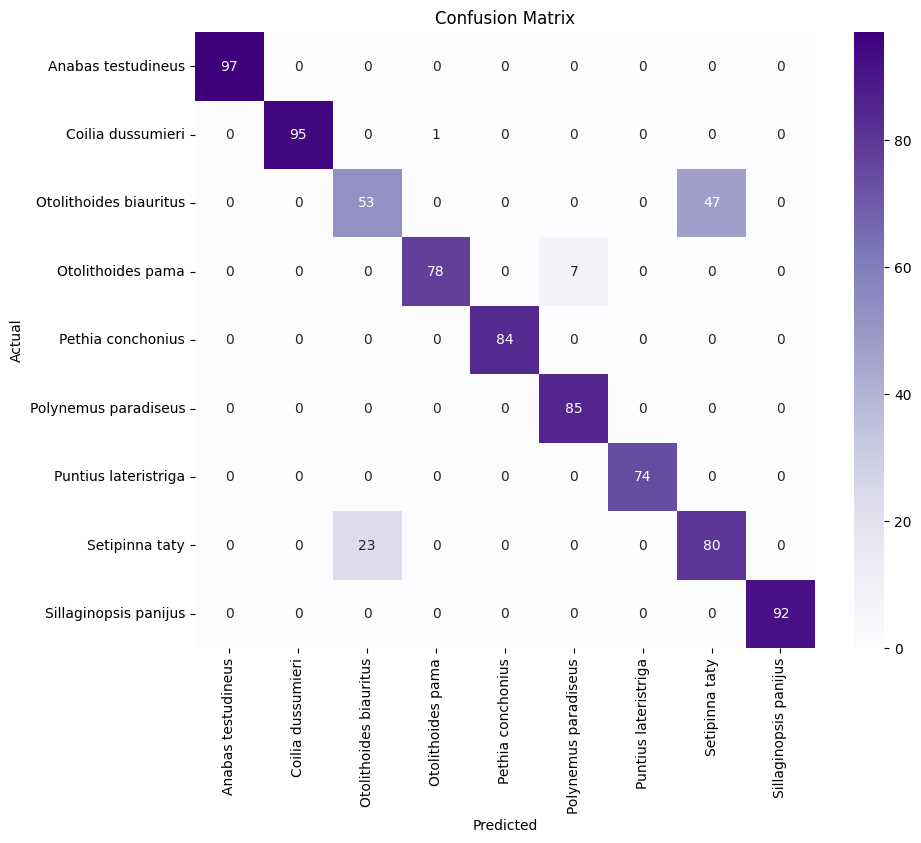

In [217]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

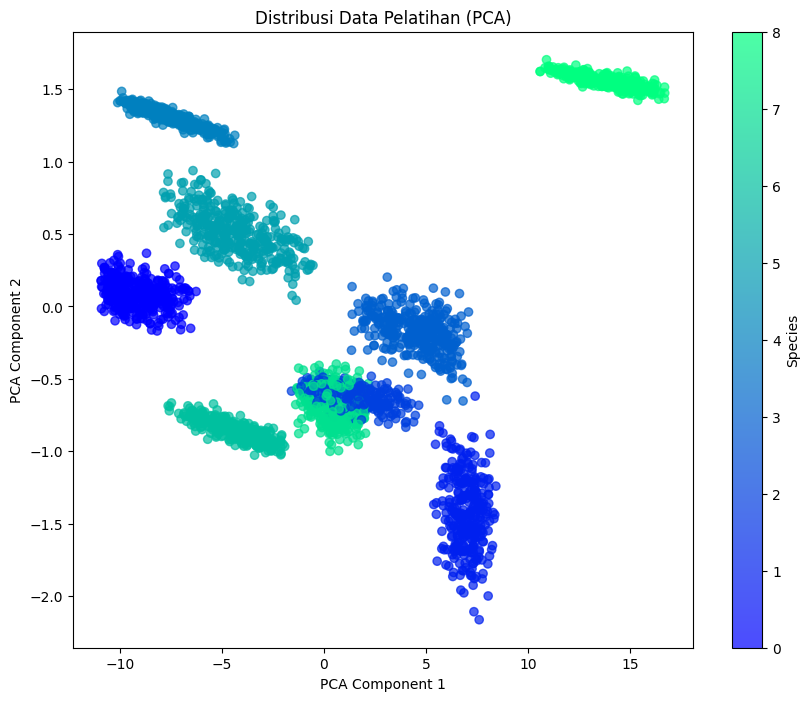

In [218]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap='winter', alpha=0.7)
plt.colorbar(scatter, ticks=range(len(label_encoder.classes_)), label='Species')
plt.title('Distribusi Data Pelatihan (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [222]:
import joblib
from sklearn.preprocessing import LabelEncoder

# Inisialisasi dan fit label encoder
label_encoder = LabelEncoder()
label_encoder.fit(df_ikan['species'])  # Pastikan menggunakan kolom 'species' dari dataset Anda

# Menyimpan label_encoder ke dalam file
joblib.dump(label_encoder, 'label_encoder.pkl')


['label_encoder.pkl']

In [223]:
import joblib

# Memuat model, scaler, dan label_encoder yang telah disimpan
loaded_classifier = joblib.load('svm_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')
label_encoder = joblib.load('label_encoder.pkl')  # Memuat label_encoder yang telah disimpan

# Data input yang akan diprediksi
input_features = [[21.26, 2.46, 0.9]]  # Panjang, berat, rasio

# Melakukan scaling pada input data menggunakan scaler yang telah dimuat
input_scaled = loaded_scaler.transform(input_features)

# Melakukan prediksi dengan model yang dimuat
prediction = loaded_classifier.predict(input_scaled)

# Menampilkan prediksi spesies
print("Prediksi Species:", label_encoder.classes_[prediction][0])


Prediksi Species: Polynemus paradiseus
